In [46]:
import sklearn
from sklearn.linear_model import Ridge
import time
from scipy.io import loadmat
import functionList
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [47]:
raw = loadmat(r"C:\Users\Matt Henningsen\Documents\ECE 697\DATA\for_Barry\335B.mat") #change this to try different one off files
X = raw['data']   #[0][0]['data'] #file format is different from ###L/R.mat vs the sample data
mask = raw['mask']
l = X.shape[0]
chan = 32

In [48]:
#holdStack = X
#for i in range(9):
#    X = np.hstack((X,holdStack))

In [49]:
featureMat = functionList.buildFeatureMat(X,12)
xClean = functionList.removeTrash(X,mask,12)
featureMat = functionList.removeTrash(featureMat,mask,12)

crossVal = sklearn.model_selection.KFold(n_splits=10)
folds = [next(crossVal.split(featureMat)) for i in range(10)]
train_in = folds[0][0]
test_in = folds[0][1]

pred = functionList.predRrOutput(featureMat[train_in,:], featureMat[test_in,:], xClean[train_in], 0, 0)

pred2 = functionList.predRrOutput(featureMat[:, :], featureMat[:,:], xClean[:], 0, 0)


In [50]:
print(train_in.shape)
print(test_in.shape)
print(pred2.shape)
print(xClean.shape)

(133226,)
(14803,)
(148029, 72)
(148029, 72)


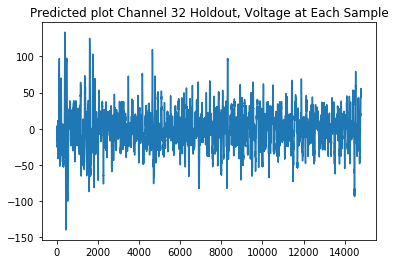

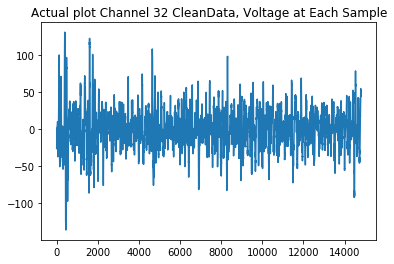

(14803, 72)
(148029, 72)


In [66]:
#0 means that the first chunk is the holdout set, right?

plt.title(f"Predicted plot Channel 32 Holdout, Voltage at Each Sample")
plt.plot(range(1, 14803), pred[range(1,14803),32], "-")
plt.show()

plt.title(f"Actual plot Channel 32 CleanData, Voltage at Each Sample")
plt.plot(range(1, 14803), xClean[range(1,14803),32], "-")
plt.show()
print(pred.shape)
print(xClean.shape)

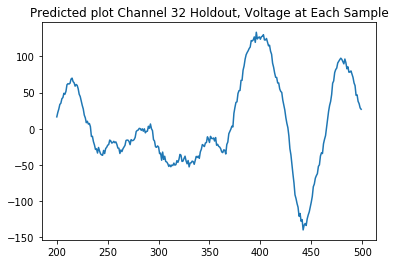

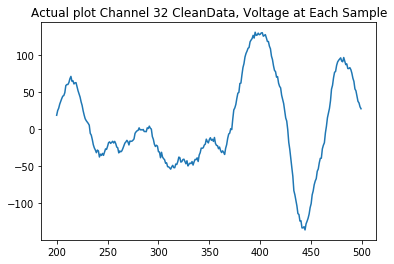

(14803, 72)
(148029, 72)


In [59]:
#HOLDOUT PREDICTED and REAL 200-500

plt.title(f"Predicted plot Channel 32 Holdout, Voltage at Each Sample")
plt.plot(range(200, 500), pred[range(200,500),32], "-", label = f"Predicted")
plt.show()

plt.title(f"Actual plot Channel 32 CleanData, Voltage at Each Sample")
plt.plot(range(200, 500), xClean[range(200,500),32], "-", label = f"Actual Data")
plt.show()
print(pred.shape)
print(xClean.shape)

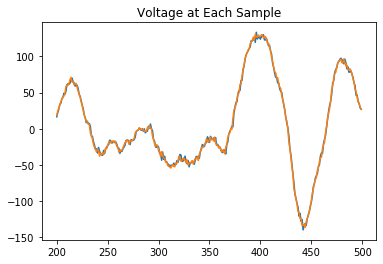

(14803, 72)
(148029, 72)


In [61]:
plt.plot(range(200, 500), pred[range(200,500),32], "-", label = f"Predicted")


plt.title(f"Voltage at Each Sample")
plt.plot(range(200, 500), xClean[range(200,500),32], "-", label = f"Actual Data")
plt.show()
#plt.legend()
print(pred.shape)
print(xClean.shape)  #Blue is predicted, Orange is real

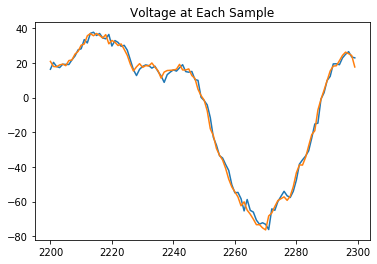

(14803, 72)
(148029, 72)


In [62]:
plt.plot(range(2200, 2300), pred[range(2200,2300),32], "-", label = f"Predicted")


plt.title(f"Voltage at Each Sample")
plt.plot(range(2200, 2300), xClean[range(2200,2300),32], "-", label = f"Actual Data")
plt.show()
#plt.legend()
print(pred.shape)
print(xClean.shape)  #Blue is predicted, Orange is real

In [37]:
print(pred2[:,32])

[-20.81607654 -23.67040555 -24.95415335 ...  17.89664386  20.19987845
  20.18072026]


In [38]:
print(xClean[:,32])

[-24.15744052 -26.52062174 -18.95161332 ...  21.89387791  21.58699062
  15.38898537]


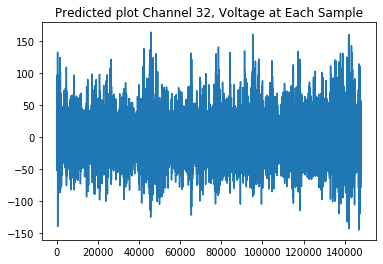

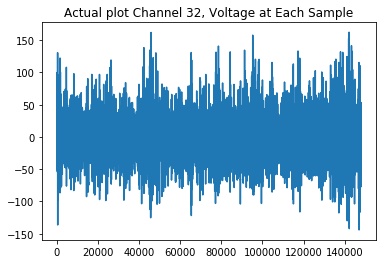

(148029, 72)
(148029, 72)


In [39]:
#FULL DATA, NO HOLDOUT


plt.title(f"Predicted plot Channel 32, Voltage at Each Sample")
plt.plot(range(1, 148030), pred2[:,32], "-")
plt.show()

plt.title(f"Actual plot Channel 32, Voltage at Each Sample")
plt.plot(range(1, 148030), xClean[:,32], "-")
plt.show()
print(pred2.shape)
print(xClean.shape)

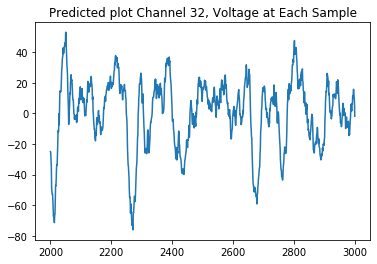

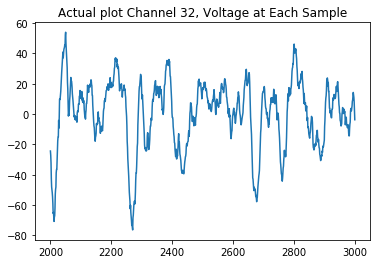

(148029, 72)
(148029, 72)


In [41]:
#PART OF DATA, NO HOLDOUT

plt.title(f"Predicted plot Channel 32, Voltage at Each Sample")
plt.plot(range(2000, 3000), pred2[range(2000,3000),32], "-")
plt.show()

plt.title(f"Actual plot Channel 32, Voltage at Each Sample")
plt.plot(range(2000, 3000), xClean[range(2000,3000),32], "-")
plt.show()
print(pred2.shape)
print(xClean.shape)